<a href="https://colab.research.google.com/github/jpmvbastos/AppliedEconometrics3/blob/main/Homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 1







In [53]:
import pandas as pd 
import numpy as np
import seaborn as sns 
sns.set_style('darkgrid')
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.discrete.discrete_model import Poisson
from statsmodels.base.model import GenericLikelihoodModel

## 2) Simulate a mixture of two normal populations

Assumptions: 

$ y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \epsilon$

$ x_1 \sim N(\mu_1, \sigma^2_1)$

$ x_2 \sim N(\mu_2, \sigma^2_2)$ 

In [5]:
# Estipulate the parameters of the population
n=1000

#Generate x1
mu1 = 2
s1 = 1
x1 = np.random.normal(mu1,s1,n)

#Generate x2
mu2 = 15
s2 = 4
x2 = np.random.normal(mu2, s2, n)

#Create X matrix

X = np.array([np.ones(n), x1 , x2]).T
X = pd.DataFrame(X)
X


,0,1,2
0,1.0,1.255247,16.576370
1,1.0,4.082118,18.195143
2,1.0,1.565613,10.042071
3,1.0,2.883446,19.451961
4,1.0,3.335945,17.024418
...,...,...,...
995,1.0,0.517967,15.450027
996,1.0,2.499153,15.947030
997,1.0,1.686185,18.980945
998,1.0,1.297425,14.300259


In [ ]:
#Establishing that we have a 50/50 mixture
p = 0.5  

R = np.random.random(n)

ind = pd.Series(R < 0.3)
ind = np.asarray(ind.replace({True:1,False:0}))
n_p = sum(ind)

## 3) Monte Carlo Simulation

Simulate 1000 observations of a variable $income$ and a variable $gender$ and use these covariates to simulate 1000 observations of the number of credit card frauds using the Poisson distribution with $\lambda_i = exp(x_i'\beta)$

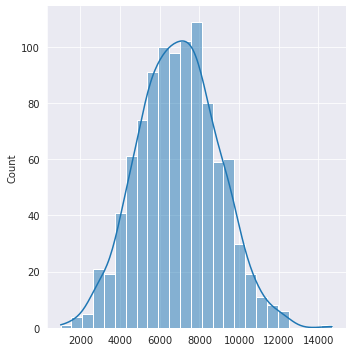

In [10]:
# Assume mean monthly income is $7000 with a variance of $2000
income = np.random.normal(7000,2000,n)
sns.displot(income, kde=True)

In [18]:
# Assume 51% of credit card owners are women
female = np.random.binomial(1, 0.51, 1000) 
print("In our sample, we have " + str(np.sum(gender)) + " women.")

In our sample, we have 520 women.


Let's assume that the number of credit card frauds is given by:

$Fraud = exp(\beta_0 + \beta_1Income + \beta_2Female)$

where $\beta_0=5$, $\beta_1 = -0.025$ and $\beta_2 = -0.05$

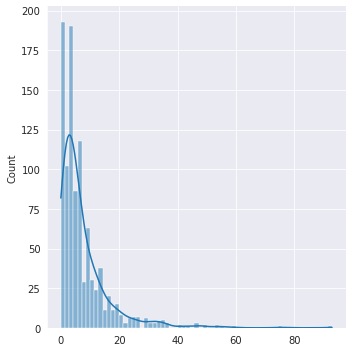

In [41]:
# Generate X matrix
X = X = np.array([np.ones(n), income , female]).T
X = pd.DataFrame(X, columns=['cons','income', 'female'])

# Apply data generating process
Xb = 5 + -0.0005*income -0.025*female

# Create Lambda
l = np.exp(Xb)

fraud = np.random.poisson(l,n)
sns.displot(fraud, kde=True)


### a) Assuming linearity, estimate the $\beta$ parameters

In [50]:
#Generate 
sm.OLS(fraud,X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     743.0
Date:                Wed, 05 Oct 2022   Prob (F-statistic):          2.80e-198
Time:                        17:13:57   Log-Likelihood:                -3166.7
No. Observations:                1000   AIC:                             6339.
Df Residuals:                     997   BIC:                             6354.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cons          32.0184      0.686     46.657      0.000      30.672      33.365
income        -0.0035   9.12e-05    -38.550      0.000      -0.004      -0.003
female        -0.3936      0.364     -1.081      0.280      -1.108       0.321
==============================================================================
Omnibus:                      827.709   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29690.047
Skew:                           3.547   Prob(JB):                         0.00
Kurtosis:                      28.734   Cond. No.                     2.77e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.77e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### b) Use Maximum Likelihood to estimate the β parameters

In [56]:
Poisson(fraud, X).fit().summary()

Optimization terminated successfully.
         Current function value: 2.110946
         Iterations 17


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                        Poisson   Df Residuals:                      997
Method:                           MLE   Df Model:                            2
Date:                Wed, 05 Oct 2022   Pseudo R-squ.:                  0.6201
Time:                        18:03:00   Log-Likelihood:                -2110.9
converged:                       True   LL-Null:                       -5557.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
cons           5.0483      0.036    140.002      0.000       4.978       5.119
income        -0.0005   6.32e-06    -80.188      0.000      -0.001      -0.000
female        -0.0338      0.023     -1.454      0.146      -0.079       0.012
==============================================================================
"""